<a href="https://colab.research.google.com/github/Aditya123Deshmukh/Aditya123Deshmukh/blob/main/Spam_Classifier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn


In [3]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

In [4]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [5]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df = df[["v1","v2"]]
df.columns = ["label","message"]

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df["label"] = df["label"].map({"ham":0,"spam":1})
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    df["message"],
    df["label"],
    test_size=0.2,
    random_state=42
)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [10]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [11]:
accuracy = model.score(X_test_vec, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9623318385650225


In [12]:
sample = ["Congratulations! You won a free iPhone. Click now!"]

vec = vectorizer.transform(sample)
prediction = model.predict(vec)

if prediction[0] == 1:
    print("Spam 🚨")
else:
    print("Not Spam ✅")


Spam 🚨


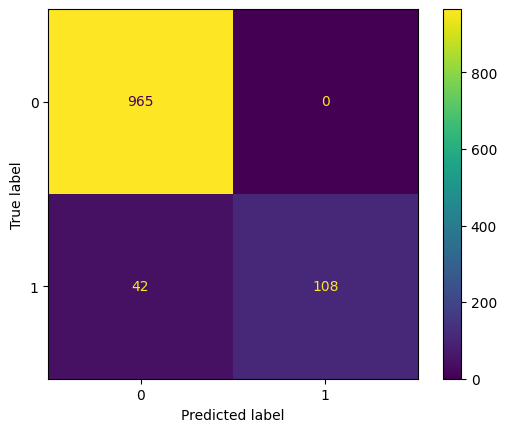

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test_vec)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [15]:
import pickle
pickle.dump(model, open("spam_model.pkl","wb"))
pickle.dump(vectorizer, open("vectorizer.pkl","wb"))


In [16]:
# Use the model to predict labels for the test set
y_pred = model.predict(X_test_vec)


In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[965   0]
 [ 42 108]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Interpretation:
The Naive Bayes model correctly detected 108 out of 150 spam emails and 965 out of 965 normal emails. There were no false positives, and only 42 spam emails were missed. Overall, the model achieved 96.2% accuracy.


| Metric | Value | Meaning                                                        |
| ------ | ----- | -------------------------------------------------------------- |
| **TN** | 965   | 965 normal (ham) emails were correctly predicted as not spam  |
| **FP** | 0     | 0 normal emails were wrongly marked as spam — perfect!       |
| **FN** | 42    | 42 spam emails were missed (predicted as normal)             |
| **TP** | 108   | 108 spam emails correctly detected                            |


In [18]:
## Upgrade 2: Logistic Regression Model
from sklearn.linear_model import LogisticRegression


In [19]:
# Create the model
lr_model = LogisticRegression(max_iter=1000)  # max_iter ensures convergence

# Train the model on the same vectorized training data
lr_model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [20]:
lr_accuracy = lr_model.score(X_test_vec, y_test)
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.967713004484305


In [21]:
nb_accuracy = model.score(X_test_vec, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)


Naive Bayes Accuracy: 0.9623318385650225
Logistic Regression Accuracy: 0.967713004484305


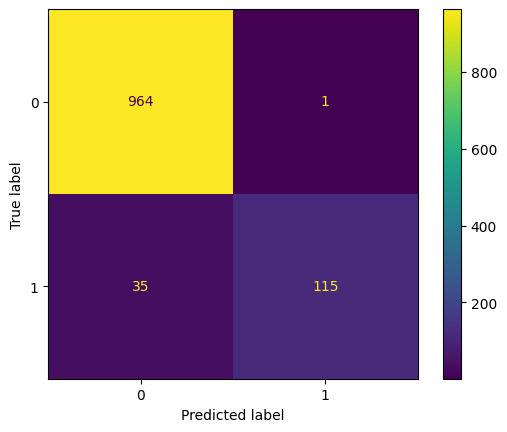

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict test set
y_pred_lr = lr_model.predict(X_test_vec)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.show()


In [24]:
from sklearn.metrics import classification_report

# Naive Bayes
print("=== Naive Bayes Classification Report ===")
y_pred_nb = model.predict(X_test_vec)
print(classification_report(y_test, y_pred_nb))

# Logistic Regression
print("=== Logistic Regression Classification Report ===")
y_pred_lr = lr_model.predict(X_test_vec)
print(classification_report(y_test, y_pred_lr))


=== Naive Bayes Classification Report ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [25]:
# Interactive test
while True:
    sample = input("\nEnter an email text (or type 'exit' to quit): ")
    if sample.lower() == "exit":
        break

    # Vectorize the input
    sample_vec = vectorizer.transform([sample])

    # Predict with Naive Bayes
    nb_result = "Spam 🚨" if model.predict(sample_vec)[0] == 1 else "Not Spam ✅"

    # Predict with Logistic Regression
    lr_result = "Spam 🚨" if lr_model.predict(sample_vec)[0] == 1 else "Not Spam ✅"

    print(f"Naive Bayes prediction: {nb_result}")
    print(f"Logistic Regression prediction: {lr_result}")



Enter an email text (or type 'exit' to quit): aditya.deshmukh30sep@gmail.com
Naive Bayes prediction: Not Spam ✅
Logistic Regression prediction: Not Spam ✅

Enter an email text (or type 'exit' to quit): exit
